In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1️⃣ Load & Inspect the Dataset

In [2]:
df = pd.read_csv("supermarket_sales.csv")

df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

## 2️⃣ Data Cleaning

In [6]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['Date'])

In [7]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [8]:
# Extract new columns (e.g., day of the week)
df['day_of_week'] = df['date'].dt.day_name()

In [9]:
# Display cleaned dataset
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  \
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1   
1  10:29         Cash   76.40                 4.761905        3.8200     9.6   
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4   
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4   
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3   

        date day_of_week  
0 2019-01-05    Saturday  
1 2019-03-08      Friday  
2 2019-03-03      Sunday  
3 2019-01-27      Sunday  
4 2019-02-08      Friday

## 3️⃣ Exploratory Data Analysis (EDA) & 4️⃣ Data Visualizations

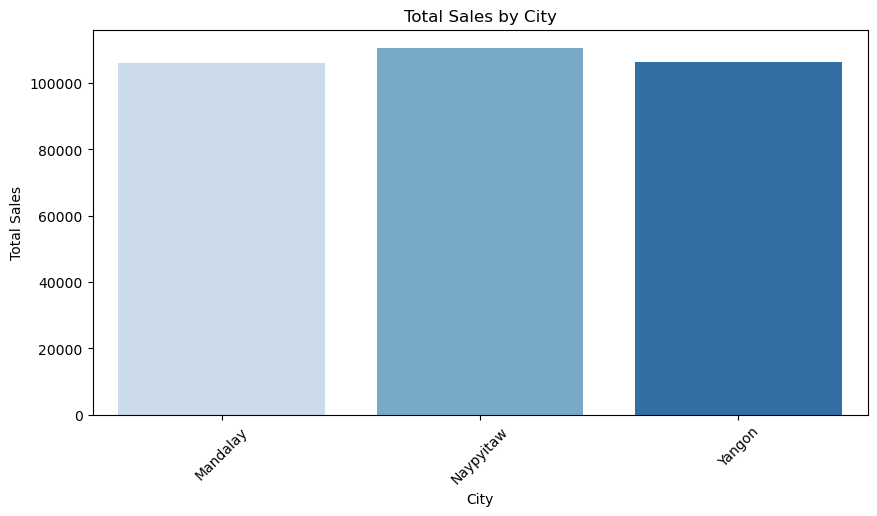

In [11]:
sales_by_city = df.groupby("City")["Total"].sum()

plt.figure(figsize=(10,5))
sns.barplot(x=sales_by_city.index, y=sales_by_city.values, palette="Blues")
plt.title("Total Sales by City")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

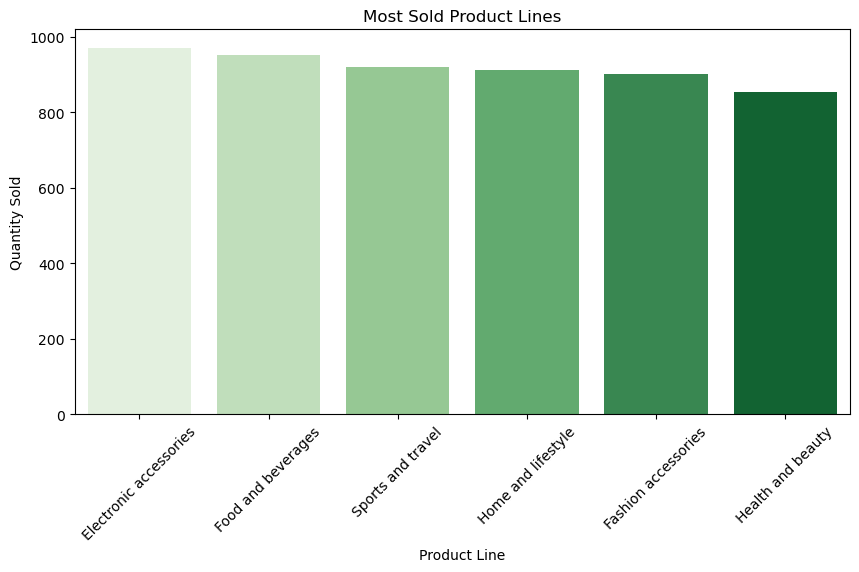

In [12]:
most_sold = df.groupby("Product line")["Quantity"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=most_sold.index, y=most_sold.values, palette="Greens")
plt.title("Most Sold Product Lines")
plt.xlabel("Product Line")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()

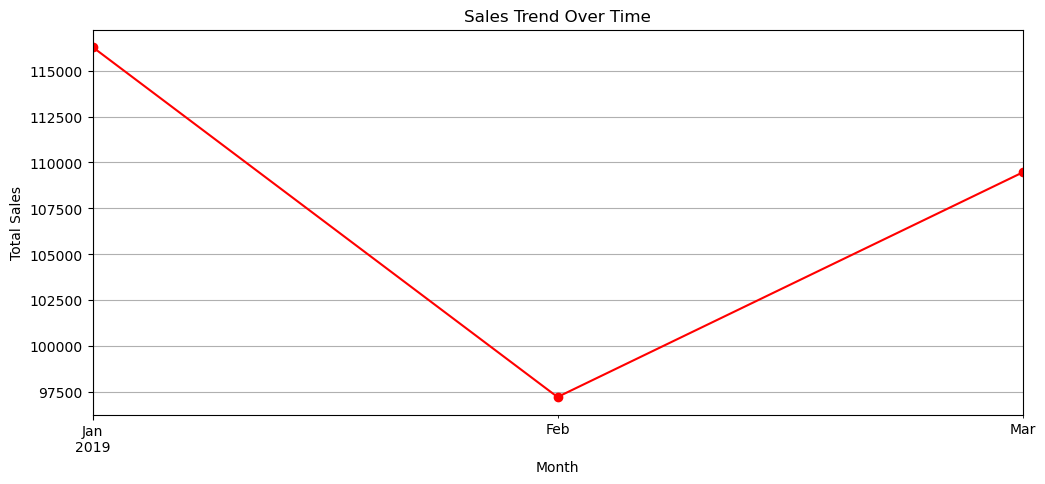

In [24]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['month'] = df['Date'].dt.to_period('M')

sales_trend = df.groupby("month")["Total"].sum()

plt.figure(figsize=(12,5))
sales_trend.plot(marker='o', color='red')
plt.title("Sales Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

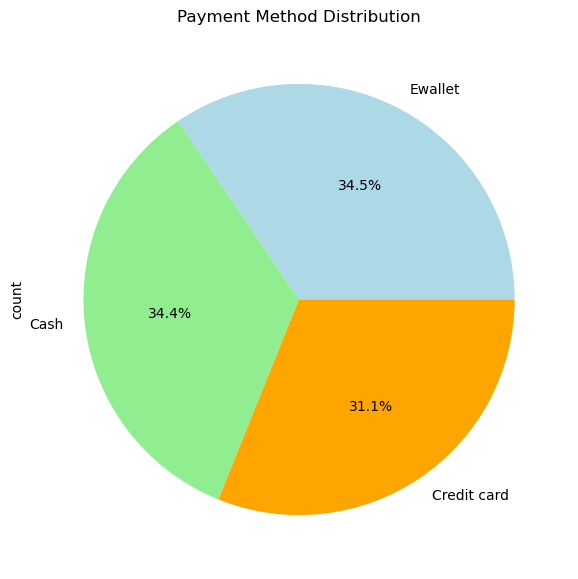

In [15]:
plt.figure(figsize=(7, 7))
df["Payment"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["lightblue", "lightgreen", "orange"])
plt.title("Payment Method Distribution")
plt.show()

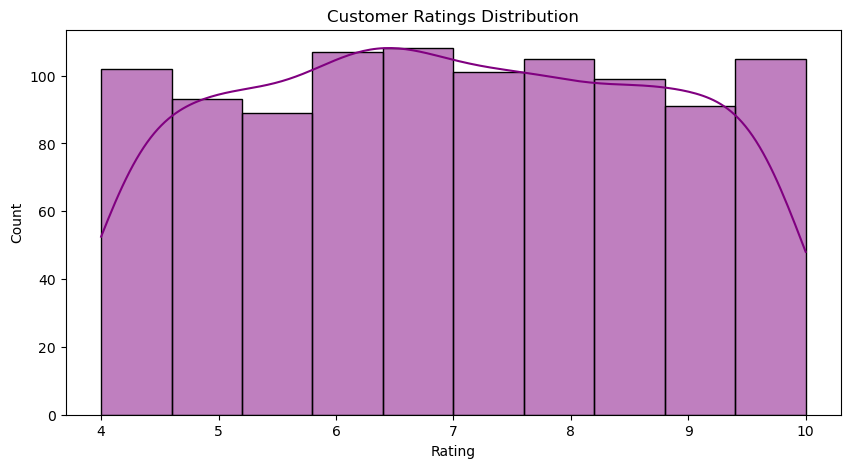

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(df["Rating"], bins=10, kde=True, color="purple")
plt.title("Customer Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

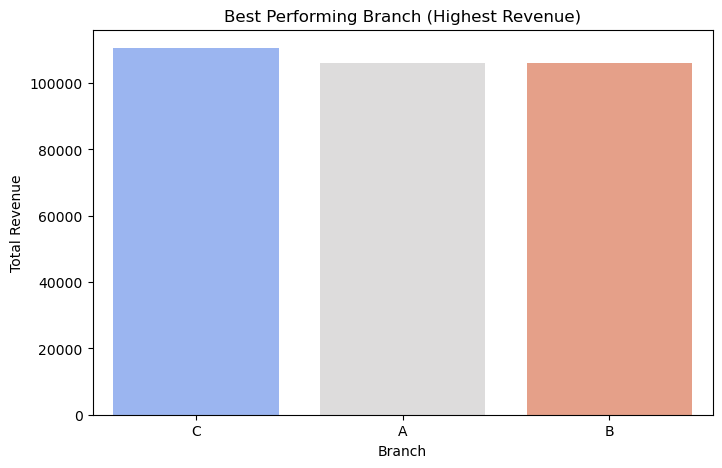

In [18]:
branch_revenue = df.groupby("Branch")["Total"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=branch_revenue.index, y=branch_revenue.values, palette="coolwarm")
plt.title("Best Performing Branch (Highest Revenue)")
plt.xlabel("Branch")
plt.ylabel("Total Revenue")
plt.show()

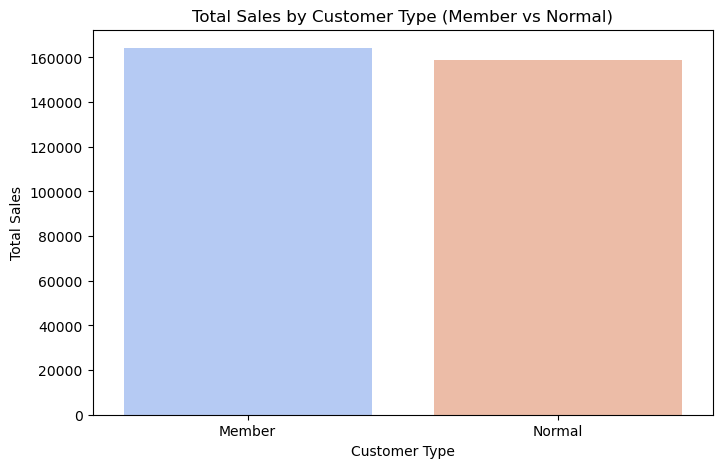

In [23]:
customer_type_sales = df.groupby("Customer type")["Total"].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=customer_type_sales.index, y=customer_type_sales.values, palette="coolwarm")
plt.title("Total Sales by Customer Type (Member vs Normal)")
plt.xlabel("Customer Type")
plt.ylabel("Total Sales")
plt.show()

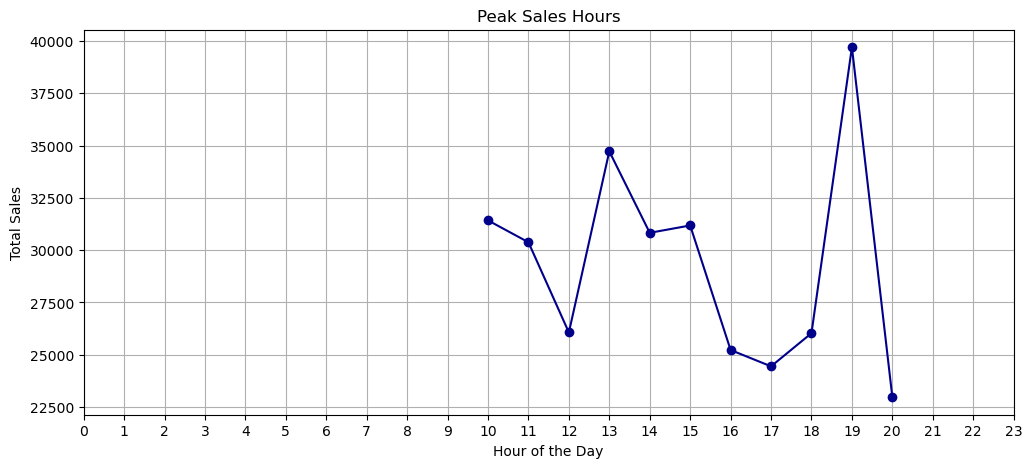

In [21]:
# Convert 'time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

# Group by hour to find peak sales time
sales_by_hour = df.groupby("Time")["Total"].sum()

plt.figure(figsize=(12,5))
sales_by_hour.plot(marker='o', color='darkblue')
plt.title("Peak Sales Hours")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Sales")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

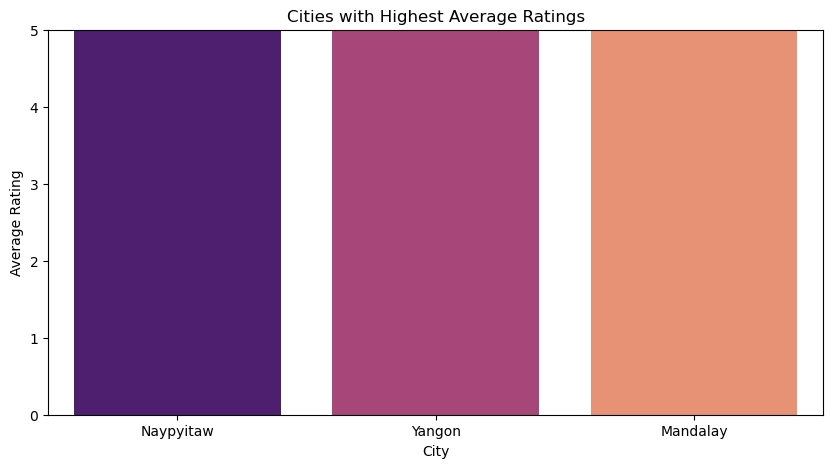

In [22]:
city_ratings = df.groupby("City")["Rating"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=city_ratings.index, y=city_ratings.values, palette="magma")
plt.title("Cities with Highest Average Ratings")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.show()

## 5️⃣ Save Processed Data

In [25]:
# Save cleaned dataset
df.to_csv("cleaned_sales_data.csv", index=False)
print("Cleaned dataset saved as 'cleaned_sales_data.csv'")

Cleaned dataset saved as 'cleaned_sales_data.csv'
